In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Q1
#read articleInfo.csv
df_1 = pd.read_csv("articleInfo.csv")
df_1

#read authorInfo.csv
df_2 = pd.read_csv("authorInfo.csv")
df_2

#merge two csv using Article No. into one dataframe
df_merged = pd.merge(df_1, df_2, how='left', on='Article No.')

#fill all empty cells with 0, inplace to persist changes in dataframe, downcast = integer
df_merged.fillna(0, inplace=True, downcast='infer')

#Print the head table
df_merged.head()

df_merged




# df_merged.to_csv('merged.csv')
# df_merged2.to_csv('chrismerged.csv')
#check if there is any empty cells
# np.where(pd.isnull(df_merged))
# print(np)

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2,virtual reality; learning; immersive media tec...,3,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2,virtual reality; learning; immersive media tec...,3,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,160,Virtual reality enhances safety training in th...,2022,2,non-WEIRD sample; safety training; simulation;...,3,Journal of Computer Assisted Learning,Objective: Many industries struggle with train...,Journal,0,0,0,0
467,161,Virtual reality for developing intercultural c...,2022,3,Affective domain; Cultural competence; Instruc...,1,Educational Technology Research & Development,Intercultural communicative competence (ICC) i...,Journal,0,0,0,0
468,162,Virtual reality in problem-based learning cont...,2021,3,English learning; motivation; problem-based le...,27,Journal of Computer Assisted Learning,Learning a foreign language requires interacti...,Journal,0,0,0,0
469,163,Virtual reality is more efficient in learning ...,2020,8,Virtual reality; Education; Human heart anatomy,36,New Ideas in Psychology,New technologies make their way into education...,Journal,0,0,0,0


C:\Users\chris\AppData\Local\Temp\ipykernel_4828\2679245437.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = df_merged.groupby("Year")["Article No."].nunique()[1:]


Text(0.5, 1.0, 'yearly_publication')

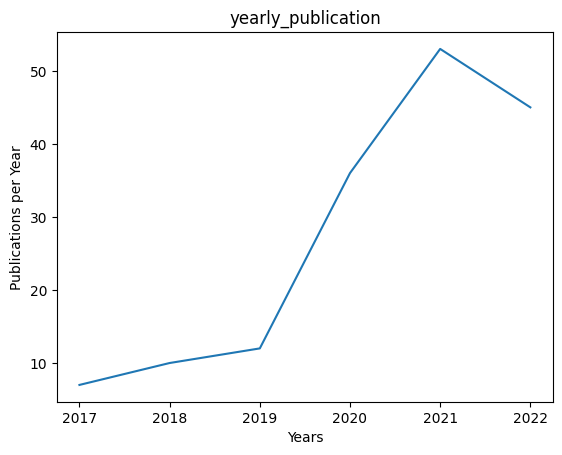

In [71]:
'''
Q1-1: Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is
the number of articles published during that year.
'''

#x-axis = years 
x = df_merged["Year"].unique()

#Sort by earliest to latest years
x = sorted(x)[1:]

y = df_merged.groupby("Year")["Article No."].nunique()[1:]



#Plot 
plt.plot(x,y)

#Labeling graphs
plt.xlabel("Years")
plt.ylabel("Publications per Year")
plt.title("yearly_publication")

C:\Users\chris\AppData\Local\Temp\ipykernel_4828\944386374.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df_merged.groupby(by=["Year"]).sum()["Citation"]
C:\Users\chris\AppData\Local\Temp\ipykernel_4828\944386374.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y[1:]


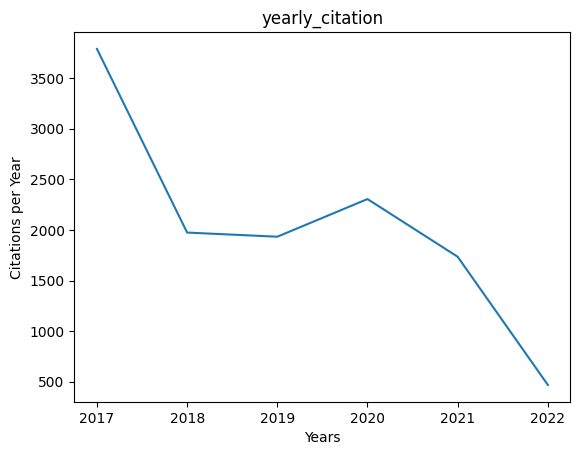

In [53]:
'''
Q1-2: Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the
total number of citations during that year.
'''

#x-axis = years
x = df_merged["Year"].unique()
x = sorted(x)[1:]
x

#y-axis = total citation per year
y = df_merged.groupby(by=["Year"]).sum()["Citation"]
y = y[1:]


#Labeling graphs
plt.xlabel("Years")
plt.ylabel("Citations per Year")
plt.title("yearly_citation")

#Plot
plt.plot(x,y)

In [ ]:
#y-axis = total citation per year
y = df_merged.groupby(by=["Year"]).mean()["Citation"].values
y


In [ ]:
'''
Q1-3:Plot the figure of the number of publications across countries.
'''
# x-axis = country
countries = df_merged["Country"].unique()
x = countries.astype(str)
x = np.delete(x, np.where(x == '0'))
x


#y-axis = num of publications
y = df_merged.groupby(by=["Country"]).count()["Title"]
#drop the row with zero
y = y.drop(y.index[0]).values
y
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45, ha="right")
plt.bar(x,y)



In [ ]:
'''
Q1-4: What are the top 5 institutions that have the most published articles in this
area?
'''

top_5_institutions = df_merged.groupby(by=["Author Affiliation"]).count()
top_5_institutions["Author Name"].nlargest(n=5)


In [ ]:
'''
Q1-5: Who are the top 5 researchers that have the most h-index in this area?
'''
top_5_researchers = df_merged.groupby(by=["Author Name"]).sum()
top_5_researchers["h-index"].nlargest(n=5)


In [ ]:
#Q2

#Read data.csv and drop teh empty column
df_data = pd.read_csv("data.csv")
df_data = df_data.drop(columns="Unnamed: 6")
df_data = df_data.fillna(0)

df_data

In [ ]:
#Create X and Y
#X axis = ASR_Error, IntentError, Duration, Gender, Purchase
#y axix = SUS
X = df_data.drop(['SUS'], axis=1)
Y = df_data['SUS']

print(X)
print(Y)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

# (X_Train, Y_train), (X_test, Y_test)
#Train data = use to train machine
#Test data = use to check accuracy of model
# test_size = 0.2 (20% Test data and 80% Training data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


In [ ]:
#Linear Regression model = Training 
model = LinearRegression().fit(X_train,Y_train)

#Y prediction use the X_Train values with the models
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(y_train_pred)
print(y_train_pred.shape)

#print(y_test_pred)


In [ ]:
#R Squared value of the linear regression model 
score_1 = model.score(X_test, Y_test)
print("The R square score of linear regression model is: ", score_1)


In [ ]:
plt.scatter(Y_train, y_train_pred)